# [1週間で学べる！Julia数値計算プログラミング](https://www.kspub.co.jp/book/detail/5282823.html)

## 4日目: 量子力学
### 微分方程式と線形代数

#### 4.1 時間依存のない1次元シュレーディンガー方程式：固有値問題を解く
$\displaystyle \left(-\frac{\hbar^2}{2m}\frac{d^2}{dx^2}+V(x)\right)\psi(x)=\epsilon\psi(x)$

適当なエネルギーの単位 $E_0=\epsilon/\epsilon^\prime$ と適当な長さの単位 $l=x/x\prime$ を用いて無次元化すると

$\displaystyle \left(-\frac{d^2}{dx\prime^2}+V^\prime(x\prime)\right)\psi(x\prime)=\epsilon^\prime\psi(x\prime).$

ここで, $\displaystyle l = \sqrt{\frac{\hbar^2}{2mE_0}}$である.

##### 4.1.1 標準的なやり方：手で解いた場合 → $V(x)=0$ の場合の解であり、ここでは省略
##### 4.1.2 計算機で解くために → 省略
##### 4.1.3 差分化で解く

テイラー展開した:

$\displaystyle \psi(x\pm\Delta x) = \psi(x)\pm\frac{d\psi(x)}{dx}\Delta x + \frac{1}{2}\frac{d^2\psi(x)}{dx^2}(\Delta x)^2+\cdots$

これより

$\displaystyle \psi(x+\Delta x) + \psi(x-\Delta x) \sim 2\psi(x) + \frac{d^2\psi(x)}{dx^2}(\Delta x)^2$

となるので, 2階微分の値は

$\displaystyle \frac{d^2\psi(x)}{dx^2}(\Delta x)^2 \sim \frac{\psi(x+\Delta x) - 2\psi(x) + \psi(x-\Delta x)}{(\Delta x)^2}$

と近似でき, これを用いた解法を差分化と呼ぶ.

この差分化を用いて1次元シュレーディンガー方程式の2階微分方程式の項を書き換えると

$\displaystyle -\frac{1}{(\Delta x)^2}\psi(x+\Delta x) + \left(\frac{2}{(\Delta x)^2} + V(x)\right)\psi(x) - \frac{1}{(\Delta x)^2}\psi(x-\Delta x) = \epsilon\psi(x)$

となる.

境界条件 $\psi(x=0)=\psi(x=L)=0$ を課すと $x=\Delta x$ および $x=L-\Delta x$ の方程式はそれぞれ

- $\displaystyle -\frac{1}{(\Delta x)^2}\psi(x_2) + \left(\frac{2}{(\Delta x)^2} + V(x_1)\right)\psi(x_1) = \epsilon\psi(x_1)$
- $\displaystyle \left(\frac{2}{(\Delta x)^2} + V(x_N)\right)\psi(x_N) - \frac{1}{(\Delta x)^2}\psi(x_{N-1}) = \epsilon\psi(x_N)$

となる. ここで $x_i = i\Delta x, \Delta x = L/(N+1)$ と定義している.

ここから $N$ 個の差分された方程式が作ることができ, これは $x_i$ における方程式

$\displaystyle \sum_j \left(d_{ij} + V(x_j)\delta_{ij}\right)\psi(x_j) = \epsilon\psi(x_i)$

を解くことで得られる. ここで, $d_{ij}=-(\delta_{i,j+1}+\delta_{i,j-1}-2\delta_{ij})/(\Delta x)^2$ であり, $\delta_{ij}$ はクロネッカーのデルタである.

すなわち, $H\vec{\psi}=\epsilon\vec{\psi}$ の $N\times N$ 行列の固有値問題を解けばよいことになる.

9.869604401089358	9.869596300201396


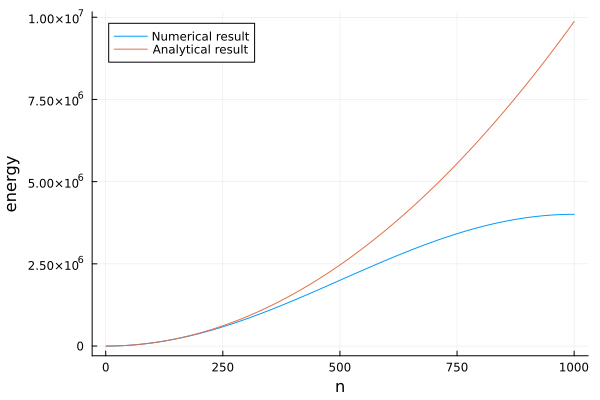

In [1]:
include("./day4/4_1_3_1.jl")

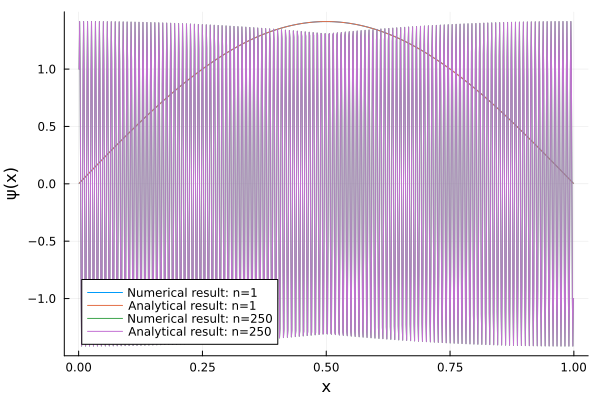

In [2]:
include("./day4/4_1_3_2.jl")

##### 4.1.4 フーリエ変換で解く

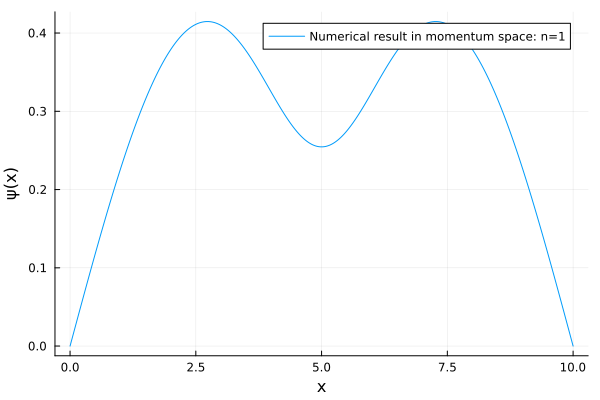

In [3]:
include("./day4/4_1_4.jl")

#### 4.2 時間依存のない2次元シュレーディンガー方程式：特殊関数を使う
##### 4.2.1 ベッセル関数のプロット

In [4]:
include("./day4/4_2_1.jl")

"c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_2_1_JY.png"

##### 4.2.2 ポテンシャルがない場合

In [5]:
include("./day4/4_2_2.jl")

"c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_2_2_J0.png"

##### 4.2.3 ポテンシャルがある場合

In [6]:
include("./day4/4_2_3_1.jl")

1.0000000000000002
-1.1152111321564758e-15


In [7]:
include("./day4/4_2_3_2.jl")

[0.15300249897678, 0.5687623101608767, 0.815581199416434, 1.4962338921937905, 2.5027463602668956, 3.5343669867924827, 4.6265225803646866, 6.088443135063626, 7.777664476293533, 9.583691385975007, 11.576569446550494, 13.805246800868078, 16.232974956088263, 18.844296646350085, 21.653224710386702, 24.664316519155694, 27.872695618393912, 31.277126367634953, 34.879117255502585, 38.678922878832594, 42.67605406284926, 46.87059029593448, 51.262756836341076, 55.852261764203696, 60.6389214077556, 65.62336589905827, 70.80596548399777, 76.18566016458166, 81.76183908261784, 87.53812514675278]
[0.05783185962946783, 0.3047126234366209, 0.7488700679069518, 1.3904028442645984, 2.229323036176342, 3.2656335293232837, 4.499335285180353, 5.9304286965595505, 7.558913947839327, 9.384791134756947, 11.408060310996461, 13.628721508540899, 16.046774747402235, 18.662220040618493, 21.475057396978414, 24.485286822580505, 27.69290832176357, 31.097921897682486, 34.700327552675574, 38.5001252885057, 42.4973151065221, 4

"c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_2_3_JV.png"

#### 4.3 波動関数の時間発展：行列演算を行う
##### 4.3.1 何も考えない方法

norm = 1.0000000000000004
 79.861060 seconds (221 allocations: 1.681 GiB, 0.06% gc time)
1-th: norm=0.9999999999999059
2-th: norm=0.9999999999998103
3-th: norm=0.9999999999997158
4-th: norm=0.9999999999996194
5-th: norm=0.999999999999524
6-th: norm=0.9999999999994295
7-th: norm=0.9999999999993345
8-th: norm=0.9999999999992389
9-th: norm=0.9999999999991436
10-th: norm=0.9999999999990484
11-th: norm=0.9999999999989531
12-th: norm=0.9999999999988579
13-th: norm=0.9999999999987625
14-th: norm=0.9999999999986662
15-th: norm=0.9999999999985713
16-th: norm=0.9999999999984757
17-th: norm=0.9999999999983796
18-th: norm=0.9999999999982847
19-th: norm=0.9999999999981888
20-th: norm=0.9999999999980934
21-th: norm=0.9999999999979966
22-th: norm=0.9999999999979017
23-th: norm=0.9999999999978069
24-th: norm=0.9999999999977112
25-th: norm=0.9999999999976156
26-th: norm=0.9999999999975206
27-th: norm=0.9999999999974236
28-th: norm=0.9999999999973282
29-th: norm=0.999999999997233
30-th: norm=0.999999999

┌ Info: Saved animation to c:\GitHub\Practice\Julia\1週間で学べる！ Julia数値計算プログラミング\day4\4_3_1.gif
└ @ Plots C:\Users\RY\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_3_1.gif")
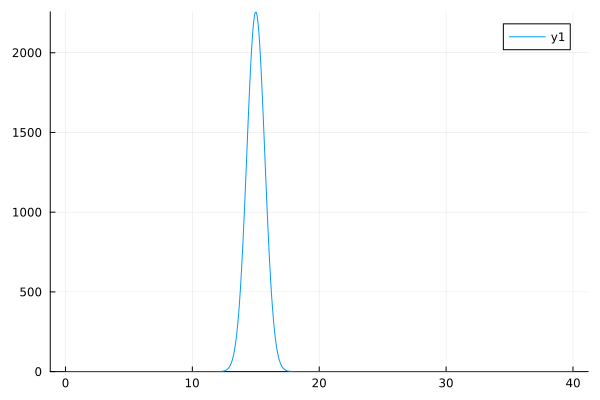

In [8]:
include("./day4/4_3_1.jl")

##### 4.3.2 少しだけ考えた方法：疎行列を使った方法

norm = 1.0000000000000004
 88.962443 seconds (221 allocations: 1.681 GiB, 0.03% gc time)
1-th: norm=0.9999999999999059
2-th: norm=0.9999999999998103
3-th: norm=0.9999999999997158
4-th: norm=0.9999999999996194
5-th: norm=0.999999999999524
6-th: norm=0.9999999999994295
7-th: norm=0.9999999999993345
8-th: norm=0.9999999999992389
9-th: norm=0.9999999999991436
10-th: norm=0.9999999999990484
11-th: norm=0.9999999999989531
12-th: norm=0.9999999999988579
13-th: norm=0.9999999999987625
14-th: norm=0.9999999999986662
15-th: norm=0.9999999999985713
16-th: norm=0.9999999999984757
17-th: norm=0.9999999999983796
18-th: norm=0.9999999999982847
19-th: norm=0.9999999999981888
20-th: norm=0.9999999999980934
21-th: norm=0.9999999999979966
22-th: norm=0.9999999999979017
23-th: norm=0.9999999999978069
24-th: norm=0.9999999999977112
25-th: norm=0.9999999999976156
26-th: norm=0.9999999999975206
27-th: norm=0.9999999999974236
28-th: norm=0.9999999999973282
29-th: norm=0.999999999997233
30-th: norm=0.999999999

┌ Info: Saved animation to c:\GitHub\Practice\Julia\1週間で学べる！ Julia数値計算プログラミング\day4\4_3_1.gif
└ @ Plots C:\Users\RY\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_3_1.gif")
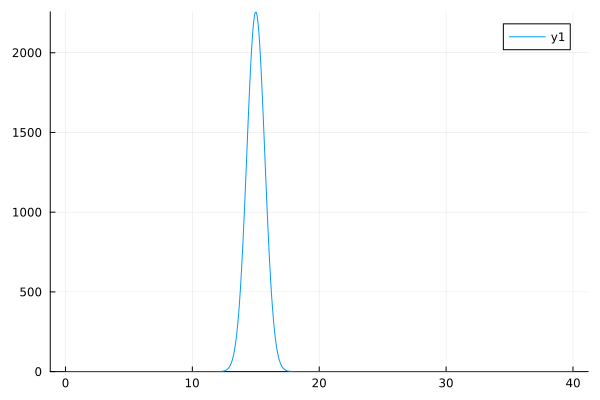

In [9]:
include("./day4/4_3_2.jl")

##### 4.3.3 陽的解法：指数関数をそのまま近似する　その１

norm = 1.0000000000000004
 87.105871 seconds (221 allocations: 1.681 GiB, 0.02% gc time)
1-th: norm=0.9999999999999059
2-th: norm=0.9999999999998103
3-th: norm=0.9999999999997158
4-th: norm=0.9999999999996194
5-th: norm=0.999999999999524
6-th: norm=0.9999999999994295
7-th: norm=0.9999999999993345
8-th: norm=0.9999999999992389
9-th: norm=0.9999999999991436
10-th: norm=0.9999999999990484
11-th: norm=0.9999999999989531
12-th: norm=0.9999999999988579
13-th: norm=0.9999999999987625
14-th: norm=0.9999999999986662
15-th: norm=0.9999999999985713
16-th: norm=0.9999999999984757
17-th: norm=0.9999999999983796
18-th: norm=0.9999999999982847
19-th: norm=0.9999999999981888
20-th: norm=0.9999999999980934
21-th: norm=0.9999999999979966
22-th: norm=0.9999999999979017
23-th: norm=0.9999999999978069
24-th: norm=0.9999999999977112
25-th: norm=0.9999999999976156
26-th: norm=0.9999999999975206
27-th: norm=0.9999999999974236
28-th: norm=0.9999999999973282
29-th: norm=0.999999999997233
30-th: norm=0.999999999

┌ Info: Saved animation to c:\GitHub\Practice\Julia\1週間で学べる！ Julia数値計算プログラミング\day4\4_3_1.gif
└ @ Plots C:\Users\RY\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_3_1.gif")
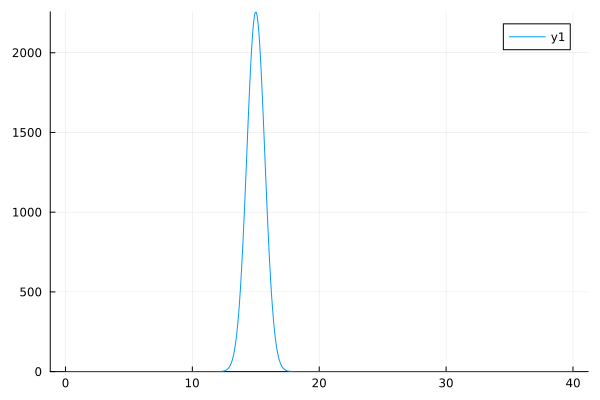

In [10]:
include("./day4/4_3_3.jl")

##### 4.3.4 陰的解法：指数関数をそのまま近似する　その２

norm = 1.0000000000000004
 87.005105 seconds (221 allocations: 1.681 GiB, 0.03% gc time)
1-th: norm=0.9999999999999059
2-th: norm=0.9999999999998103
3-th: norm=0.9999999999997158
4-th: norm=0.9999999999996194
5-th: norm=0.999999999999524
6-th: norm=0.9999999999994295
7-th: norm=0.9999999999993345
8-th: norm=0.9999999999992389
9-th: norm=0.9999999999991436
10-th: norm=0.9999999999990484
11-th: norm=0.9999999999989531
12-th: norm=0.9999999999988579
13-th: norm=0.9999999999987625
14-th: norm=0.9999999999986662
15-th: norm=0.9999999999985713
16-th: norm=0.9999999999984757
17-th: norm=0.9999999999983796
18-th: norm=0.9999999999982847
19-th: norm=0.9999999999981888
20-th: norm=0.9999999999980934
21-th: norm=0.9999999999979966
22-th: norm=0.9999999999979017
23-th: norm=0.9999999999978069
24-th: norm=0.9999999999977112
25-th: norm=0.9999999999976156
26-th: norm=0.9999999999975206
27-th: norm=0.9999999999974236
28-th: norm=0.9999999999973282
29-th: norm=0.999999999997233
30-th: norm=0.999999999

┌ Info: Saved animation to c:\GitHub\Practice\Julia\1週間で学べる！ Julia数値計算プログラミング\day4\4_3_1.gif
└ @ Plots C:\Users\RY\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_3_1.gif")
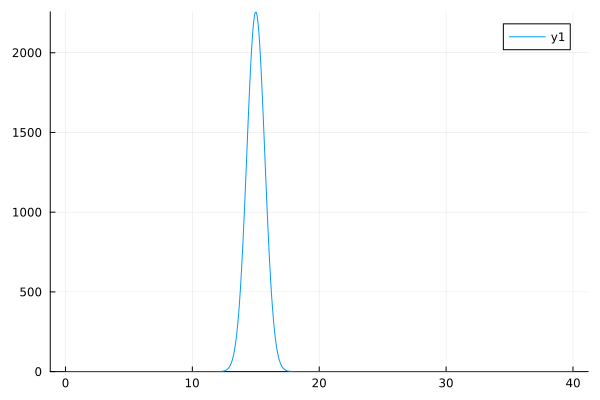

In [11]:
include("./day4/4_3_4.jl")

##### 4.3.5 クランク-ニコルソン法：陽的解法と陰的解法の混合

norm = 1.0000000000000004
 84.946755 seconds (221 allocations: 1.681 GiB, 0.03% gc time)
1-th: norm=0.9999999999999059
2-th: norm=0.9999999999998103
3-th: norm=0.9999999999997158
4-th: norm=0.9999999999996194
5-th: norm=0.999999999999524
6-th: norm=0.9999999999994295
7-th: norm=0.9999999999993345
8-th: norm=0.9999999999992389
9-th: norm=0.9999999999991436
10-th: norm=0.9999999999990484
11-th: norm=0.9999999999989531
12-th: norm=0.9999999999988579
13-th: norm=0.9999999999987625
14-th: norm=0.9999999999986662
15-th: norm=0.9999999999985713
16-th: norm=0.9999999999984757
17-th: norm=0.9999999999983796
18-th: norm=0.9999999999982847
19-th: norm=0.9999999999981888
20-th: norm=0.9999999999980934
21-th: norm=0.9999999999979966
22-th: norm=0.9999999999979017
23-th: norm=0.9999999999978069
24-th: norm=0.9999999999977112
25-th: norm=0.9999999999976156
26-th: norm=0.9999999999975206
27-th: norm=0.9999999999974236
28-th: norm=0.9999999999973282
29-th: norm=0.999999999997233
30-th: norm=0.999999999

┌ Info: Saved animation to c:\GitHub\Practice\Julia\1週間で学べる！ Julia数値計算プログラミング\day4\4_3_1.gif
└ @ Plots C:\Users\RY\.julia\packages\Plots\sxUvK\src\animation.jl:156


Plots.AnimatedGif("c:\\GitHub\\Practice\\Julia\\1週間で学べる！ Julia数値計算プログラミング\\day4\\4_3_1.gif")
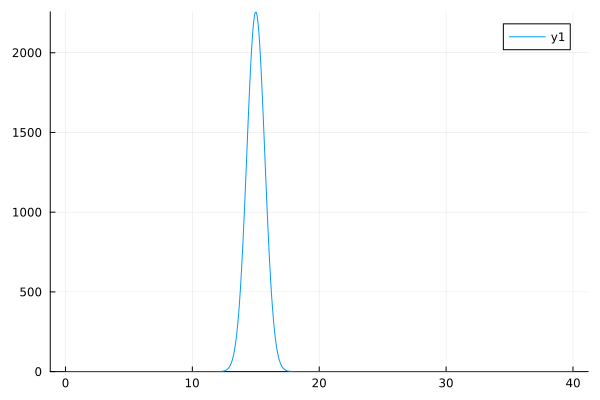

In [12]:
include("./day4/4_3_5.jl")

##### 4.3.6 トンネル効果